# Angewandtes Finden von maximalen Flüssen und deren Visualisierung

# Studierendenprojekte

### Studierende $S = \{S_1, \dots, S_n\}$ mit jeweils genau einem Projekt
### Professoren $P = \{P_1, \dots, P_k\}$
### Für jedes Projekt ist ein Prof. entweder Spezialist oder nicht:
### $\forall i=1,\dots,n: P$ partitioniert in $Sp_i$ und $NSp_i$
### Jeder Prof. $P_j$ kann an höchstens $a_j$ Verteidigungen teilnehmen.
### Jeder Studierende stellt sein Projekt vor genau $x$ Profs. vor, die alle Spezialisten sein müssen.

### Organisiere die Jury.

### Modelliere dieses Problem zunächst als Flussnetzwerk auf Papier.
### Implementiere und visualisiere danach.

In [103]:
import networkx as nx
import numpy as np

In [110]:
np.random.seed(0)
x = 1 #Anzahl der Projekte pro Stud
n = 8 #Anzahl Studierende
k = 3 #Anzahl Profs
_p_spec = 0.5 #Wahrscheinlichkeit, dass ein Prof für ein Projekt Spezialist ist
#spec[i] = Menge der Profs, die Spezialisten für Projekt i sind
spec = [[j for j in range(k) if np.random.random() < _p_spec] for i in range(n)]
#maximale Auslastung der Profs
prof_max = [np.random.randint(4)+1 for j in range(k)]

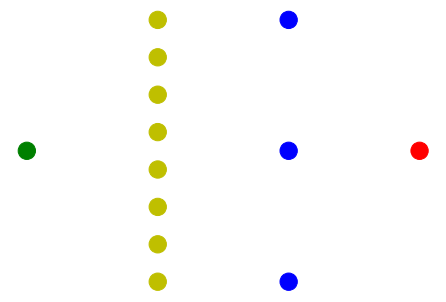

In [108]:
source = 0
student_nodes = list(range(1,n+1))
prof_nodes = list(range(n+1, n+k+1))
sink = n+k+1

G = nx.DiGraph()
G.add_node(source) #source
G.add_nodes_from(student_nodes) #students
G.add_nodes_from(prof_nodes) #profs
G.add_node(sink) #sink 

####### 
####### add edges
####### use G.add_edge(u, v, capacity=c) where you choose u,v and c
####### 

### defines a 2D position for every node
lin_stud = np.linspace(0,1,n)
lin_prof = np.linspace(0,1,k)
pos = {source : (0, 0.5), sink : (3, 0.5)}
pos.update({i : (1,lin_stud[ni]) for ni,i in enumerate(student_nodes)})
pos.update({j : (2, lin_prof[nj]) for nj,j in enumerate(prof_nodes)})

### defines a color position for every type of node
col = {source : "g", sink : "r"}
col.update({i : "y" for i in student_nodes})
col.update({j : "b" for j in prof_nodes})
col = list([col[x] for x in G.nodes])

edge_labels = {e : str(c) for e,c in nx.get_edge_attributes(G, "capacity").items()}

nx.draw(G, pos=pos, node_color=col)
_ = nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

### Benutze den Edmonds-Karp Algorithmus, um in deinem Graphen einen maximalen Fluss zu finden und versuche, den Fluss zu visualisieren.
### (https://networkx.org/documentation/networkx-1.9/reference/generated/networkx.algorithms.flow.edmonds_karp.html)

### Wie findet man jetzt einen min cut?
##### Nutze den Rückgabewert (Residual nertwork) of nx.algorithms.flow.edmonds_karp